In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from Darknet_Classification_FeatureSel.featureSelection import *

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree

In [2]:
random_state = 42
dataset_folder = "Dataset/processed_dataset/" 
img_folder = "Images/"

np.random.seed(random_state)
plt.rcParams['figure.figsize'] = (18,6)
plt.rcParams["savefig.format"] = 'jpg'
plt.rcParams["savefig.dpi"] = 600
plt.rcParams.update({'font.size': 18})

In [3]:
samples_detec = pd.read_csv(dataset_folder + "darknet_dataset_processed_encoded.csv")
del samples_detec['Label.1']
samples_detec.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,0,0,0,0,0,0,0,0,...,0.589647,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Benign
1,0,0,0,0,0,0,0,0,0,0,...,0.589647,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Benign
2,0,0,0,0,0,0,0,0,0,0,...,0.589647,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Benign
3,0,0,0,0,0,0,0,0,0,0,...,0.589647,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Benign
4,0,0,0,0,0,0,0,0,0,0,...,0.589647,0,0,0,0,1.437760e+15,3117718.131,1.437760e+15,1.437760e+15,Benign


In [4]:
samples_app = pd.read_csv(dataset_folder + "darknet_dataset_processed_encoded.csv")
samples_app = samples_app[samples_app['Label'] == 'Darknet']
del samples_app['Label']
samples_app.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label.1
117170,0,0,0,0,0,0,0,0,0,0,...,0.589647,0,0,0,0,1.456330e+15,3.683488e+07,1.456330e+15,1.456330e+15,Audio-Streaming
117171,0,0,0,0,0,0,0,0,0,0,...,0.589647,0,0,0,0,1.456330e+15,3.558961e+07,1.456330e+15,1.456330e+15,Audio-Streaming
117172,0,0,0,0,0,0,0,0,0,0,...,0.589647,0,0,0,0,1.456330e+15,3.301057e+07,1.456330e+15,1.456330e+15,Audio-Streaming
117173,0,0,0,0,0,0,0,0,0,0,...,0.589647,0,0,0,0,1.456330e+15,5.227810e+05,1.456330e+15,1.456330e+15,Audio-Streaming
117174,0,0,0,0,0,0,0,0,0,0,...,0.589647,0,0,0,0,1.456330e+15,1.052330e+05,1.456330e+15,1.456330e+15,Audio-Streaming


In [5]:
X, y, labels = split_train_target(samples_detec, "Label")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
columns = samples_detec.columns.tolist()

In [6]:
dt = DecisionTreeClassifier()
rfe_dt = select_features_rfecv(dt, X, y, 1, step=1)

100%|██████████| 10/10 [00:28<00:00,  2.90s/it, Test acc. #9=0.999]


       precision       recall       f1-score       support       
Benign:   99.93		99.93		99.93		784910.00		
Darknet:  99.65		99.68		99.67		163010.00		


 10-fold Accuracy: 99.89%
Test accuracy: 99.92%


Confusion matrix:
[[38660    19]
 [   19  7991]]

Benign :    99.95%
Darknet :   99.76%


AttributeError: 'NoneType' object has no attribute 'write'

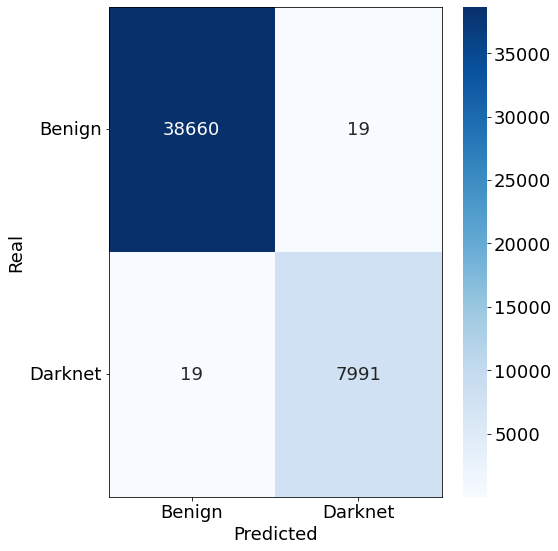

In [ ]:
#fname None so we cannot save figure to a file.
final_report_dt = final_evaluation_rfe(dt, X, y, labels, rfe_dt)
print()
print(f"Optimal number of features: {rfe_dt.n_features_}")
selected_columns_dt = summarize_feats(rfe_dt, dt, columns)

In [ ]:
dotfile = open("dtree3.dot", 'w')
export_graphviz(dt, out_file = dotfile, feature_names = selected_columns_dt)
dotfile.close()

NameError: name 'selected_columns_dt' is not defined

In [ ]:
rf = RandomForestClassifier()
rfe_rf = select_features_rfecv(rf, X, y, 1, step=1)

In [ ]:
final_report_rf = final_evaluation_rfe(rf, X, y, labels, rfe_rf)
print()
print(f"Optimal number of features: {rfe_rf.n_features_}")
selected_columns_rf = summarize_feats(rfe_rf, rf, columns)

In [ ]:
X1, y1, labels1 = split_train_target(samples_app, "Label.1")
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.33, random_state=random_state)
columns1 = samples_app.columns.tolist()

In [ ]:
dt1 = DecisionTreeClassifier(random_state=random_state)
rfe_dt1 = select_features_rfecv(dt1, X1, y1, 1, step=1)

In [ ]:
final_evaluation_rfe(dt1, X1, y1, labels1, rfe_dt1)
print()
print(f"Optimal number of features: {rfe_dt1.n_features_}")
selected_columns_dt1 = summarize_feats(rfe_dt1, dt1, columns1)

In [ ]:
dotfile = open("dtree2.dot", 'w')
export_graphviz(dt1, out_file = dotfile, feature_names = selected_columns_dt1)
dotfile.close()

In [ ]:
rf1 = RandomForestClassifier(random_state=random_state)
rfe_rf1 = select_features_rfecv(rf1, X1, y1, 1, step=1)

In [ ]:
final_report_rf1 = final_evaluation_rfe(rf1, X1, y1, labels1, rfe_rf1)
print()
print(f"\nOptimal number of features: {rfe_rf1.n_features_}")
selected_columns_rf1 = summarize_feats(rfe_rf1, rf1, columns1)